# Business Understanding

## Project Domain

Domain ini berfokus pada klasifikasi objek astronomi seperti bintang, galaksi, dan quasar, dengan memanfaatkan teknik machine learning dan analisis spektral berdasarkan data observasi langit. Proyek ini berada di titik temu antara beberapa bidang ilmiah dan teknologi, yaitu:

1. Astrofisika Observasional: Menggunakan data hasil observasi langit dari teleskop dalam proyek survei seperti SDSS.
2. Data Science dan Machine Learning: Mengolah data numerik multi-dimensional untuk menghasilkan model prediktif berbasis algoritma pembelajaran mesin, khususnya Artificial Neural Network (ANN).
3. Spektroskopi Astronomi: Menganalisis karakteristik spektral (seperti magnitude dan redshift) yang menjadi kunci dalam membedakan jenis objek langit.
4. Survey Astronomi Skala Besar: Mendukung pengolahan dan klasifikasi jutaan objek astronomi yang dihasilkan dari survei data berskala besar seperti Sloan Digital Sky Survey (SDSS).

## Problem Statements

Masalah Utama:
Identifikasi dan klasifikasi otomatis objek-objek astronomi (bintang, galaksi, dan quasar) dari data spektroskopi dan fotometri SDSS masih menghadapi tantangan dalam hal:

1. Akurasi Klasifikasi: Membedakan antara bintang, galaksi, dan quasar berdasarkan karakteristik spektral dan fotometri yang kompleks
2. Skalabilitas: Memproses jutaan objek astronomi dengan efisien dan akurat
3. Konsistensi: Mengurangi bias dan inkonsistensi dalam klasifikasi manual
4 Kompleksitas Data: Menangani data multi-dimensional dengan noise dan outliers

## Goals

1. Mengembangkan model machine learning yang dapat mengklasifikasikan objek astronomi dengan akurasi >95%
2. Mengidentifikasi fitur spektral dan fotometri yang paling signifikan untuk klasifikasi
3. Membuat sistem klasifikasi otomatis yang dapat diintegrasikan dalam pipeline SDSS
4. Analisis distribusi objek astronomi berdasarkan parameter fisik
5. Identifikasi outliers dan objek dengan karakteristik unik

## Solution Statements

Model ANN akan dilatih menggunakan fitur utama seperti magnitude (u, g, r, i, z) dan redshift, yang telah dinormalisasi dan dibersihkan dari noise dan outlier. Arsitektur jaringan dirancang untuk menangani kompleksitas data multi-dimensional dan mengenali pola non-linear yang membedakan bintang, galaksi, dan quasar.

Solusi ini juga akan mencakup:

1. Analisis kontribusi fitur terhadap klasifikasi,

2. Deteksi objek outlier dengan karakteristik unik,

3. integrasi ke dalam pipeline klasifikasi otomatis berbasis data survey astronomi skala besar seperti SDSS.

Dengan akurasi target di atas 95%, sistem ini akan mempercepat proses identifikasi astronomi dan meningkatkan konsistensi klasifikasi dalam penelitian astrofisika modern.



# Data Understanding

## Import data dari kaggle

In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ratnahanifiah","key":"ae0e96e7c424cdcf8459ffbdef618080"}'}

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [3]:
!kaggle datasets download -d fedesoriano/stellar-classification-dataset-sdss17

Dataset URL: https://www.kaggle.com/datasets/fedesoriano/stellar-classification-dataset-sdss17
License(s): copyright-authors
  0% 0.00/6.89M [00:00<?, ?B/s]
100% 6.89M/6.89M [00:00<00:00, 617MB/s]


In [4]:
!unzip stellar-classification-dataset-sdss17.zip

Archive:  stellar-classification-dataset-sdss17.zip
  inflating: star_classification.csv  


## Import Library yang dibutuhkan

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow.keras as keras

from tensorflow.keras import layers
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, classification_report

import tensorflow as tf
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam

## Exploratory Data Analysis

In [6]:
df = pd.read_csv('star_classification.csv')

In [7]:
df.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(7),

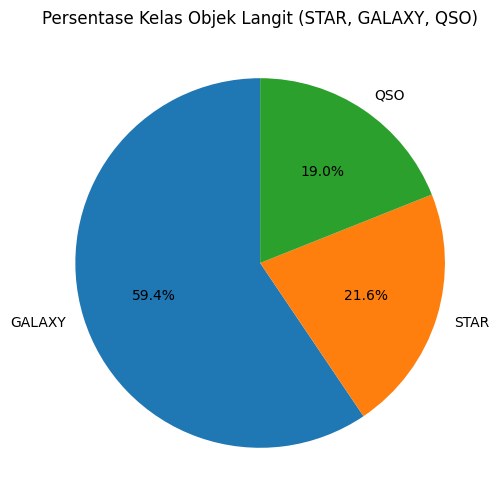

In [ ]:
plt.figure(figsize=(6, 6))
class_counts = df['class'].value_counts()
plt.pie(class_counts.values, labels=class_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Persentase Kelas Objek Langit (STAR, GALAXY, QSO)')
plt.show()

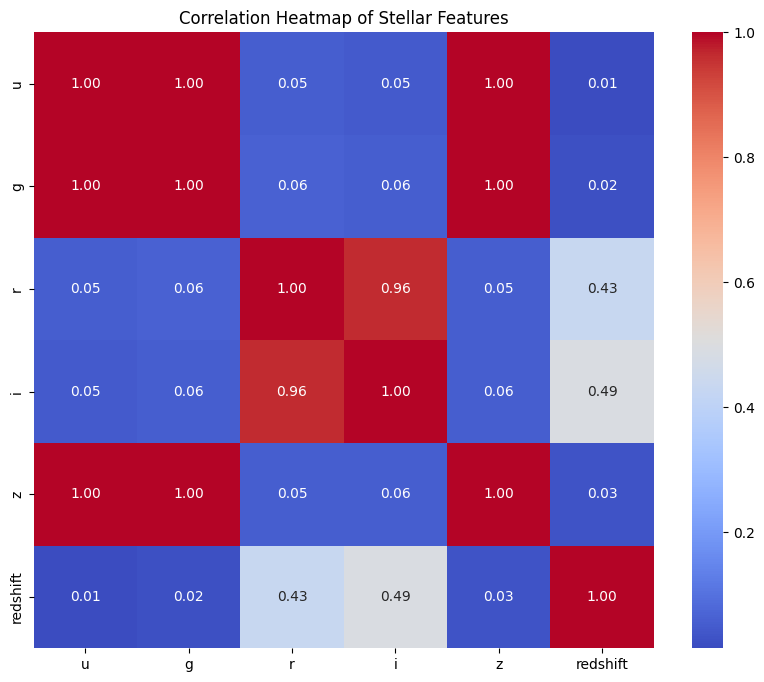

In [ ]:
numerical_features = ['u', 'g', 'r', 'i', 'z', 'redshift']
heatmap_data = df[numerical_features].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Stellar Features')
plt.show()

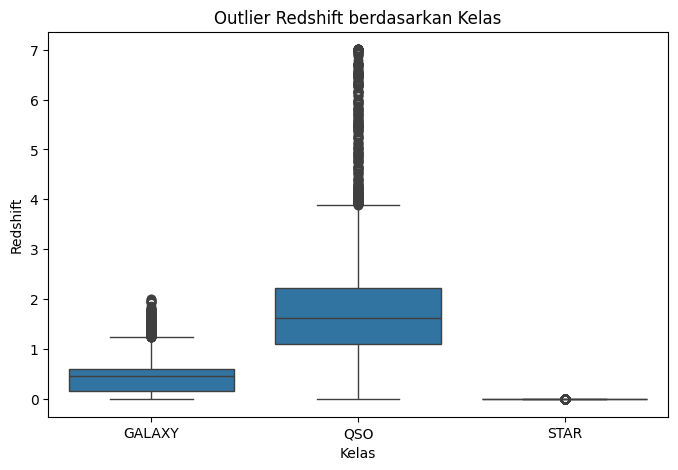

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x='class', y='redshift', data=df)
plt.title('Outlier Redshift berdasarkan Kelas')
plt.xlabel('Kelas')
plt.ylabel('Redshift')
plt.show()

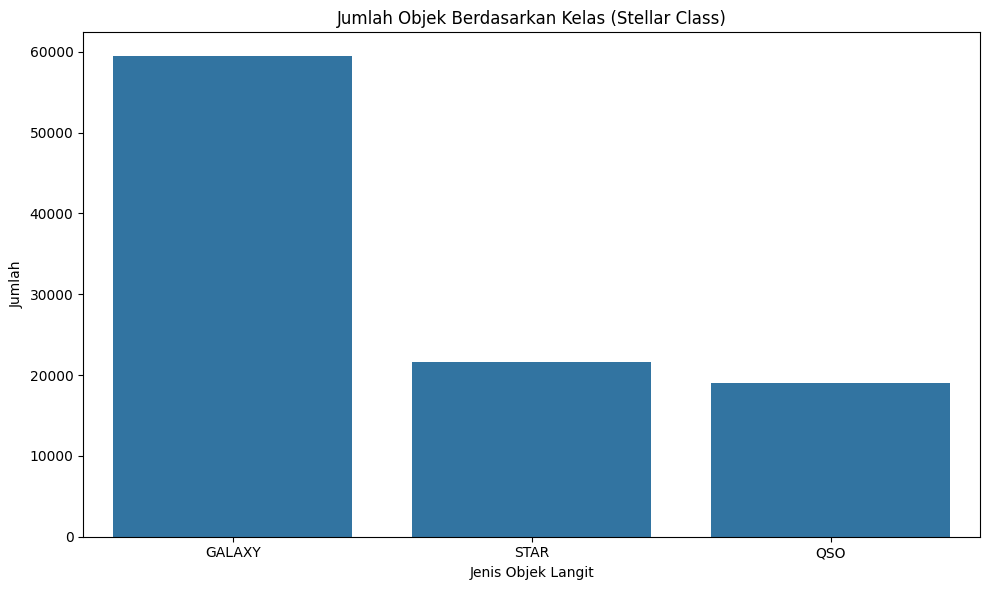

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='class', data=df, order=df['class'].value_counts().index)
plt.title('Jumlah Objek Berdasarkan Kelas (Stellar Class)')
plt.xlabel('Jenis Objek Langit')
plt.ylabel('Jumlah')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

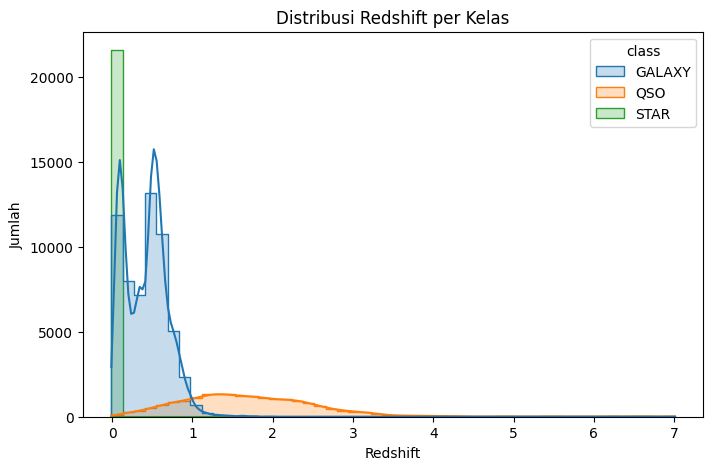

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(data=df, x='redshift', hue='class', kde=True, bins=50, element="step")
plt.title('Distribusi Redshift per Kelas')
plt.xlabel('Redshift')
plt.ylabel('Jumlah')
plt.show()

# Data Preparation

In [8]:
df.drop(["obj_ID", "alpha", "delta", "run_ID", "rerun_ID", "cam_col",
                     "field_ID", "spec_obj_ID", "plate", "MJD", "fiber_ID"],axis=1,inplace=True)


In [9]:
df['class'].unique()

array(['GALAXY', 'QSO', 'STAR'], dtype=object)

In [10]:
df.head()

,u,g,r,i,z,class,redshift
0,23.87882,22.27530,20.39501,19.16573,18.79371,GALAXY,0.634794
1,24.77759,22.83188,22.58444,21.16812,21.61427,GALAXY,0.779136
2,25.26307,22.66389,20.60976,19.34857,18.94827,GALAXY,0.644195
3,22.13682,23.77656,21.61162,20.50454,19.25010,GALAXY,0.932346
4,19.43718,17.58028,16.49747,15.97711,15.54461,GALAXY,0.116123


In [11]:
df['class']

,class
0,GALAXY
1,GALAXY
2,GALAXY
3,GALAXY
4,GALAXY
...,...
99995,GALAXY
99996,GALAXY
99997,GALAXY
99998,GALAXY


In [12]:
print(df.columns)

Index(['u', 'g', 'r', 'i', 'z', 'class', 'redshift'], dtype='object')


In [15]:
# Define features (X) and target (y)
X = df.drop('class', axis=1)
y = df['class']

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [16]:
y_encoded=tf.keras.utils.to_categorical(y_encoded)

In [17]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

# Modeling

In [19]:
model = keras.Sequential([
    keras.Input(shape=(X_train.shape[1],)),
    layers.Dense(128, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(len(label_encoder.classes_), activation="softmax")
])

In [20]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [21]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,331 (44.26 KB)

 Trainable params: 11,331 (44.26 KB)

 Non-trainable params: 0 (0.00 B)

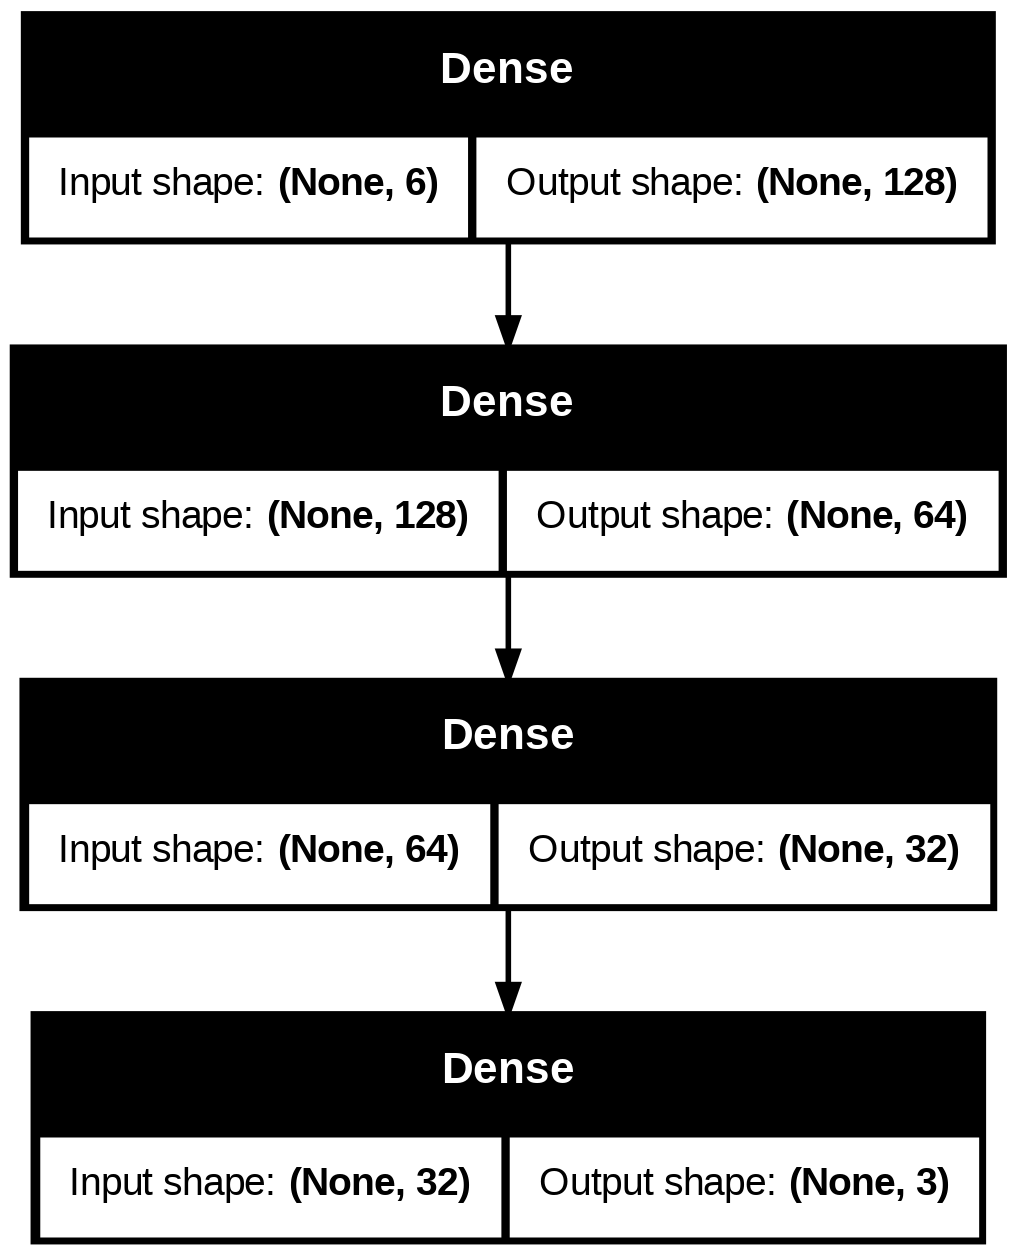

In [22]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes = True)

In [23]:
history = model.fit(X_train, y_train,
                    epochs=30,
                    batch_size=32,
                    validation_data=(X_test, y_test))

Epoch 1/30
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8225 - loss: 0.4492 - val_accuracy: 0.9435 - val_loss: 0.1962
Epoch 2/30
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9438 - loss: 0.1870 - val_accuracy: 0.9416 - val_loss: 0.1896
Epoch 3/30
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9508 - loss: 0.1675 - val_accuracy: 0.9583 - val_loss: 0.1468
Epoch 4/30
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9536 - loss: 0.1565 - val_accuracy: 0.9607 - val_loss: 0.1371
Epoch 5/30
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9564 - loss: 0.1490 - val_accuracy: 0.9622 - val_loss: 0.1317
Epoch 6/30
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9576 - loss: 0.1442 - val_accuracy: 0.9628 - val_loss: 0.1346
Epoch 7/30
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9600 - loss: 0.1377 - val_accuracy: 0.9596 - val_loss: 0.1552
Epoch 8/30
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9602 - loss: 0.1338 

# Evaluation

In [24]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy * 100:.2f}%")

Test Loss: 0.1082
Test Accuracy: 96.88%


In [25]:
plt.figure(figsize=(12, 5))

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

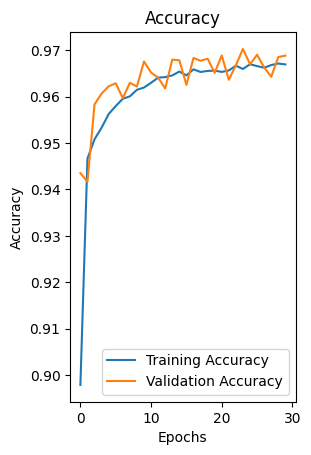

In [26]:
plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy')
plt.legend()

plt.show()

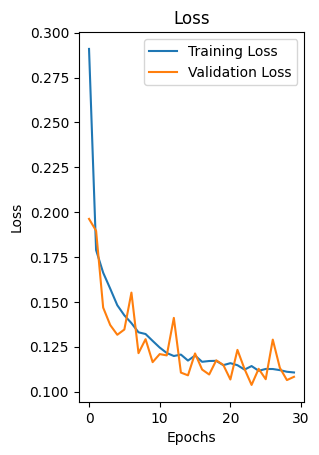

In [27]:
plt.subplot(1, 2, 2)
plt.plot(history.history["loss"], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss')
plt.legend()

625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


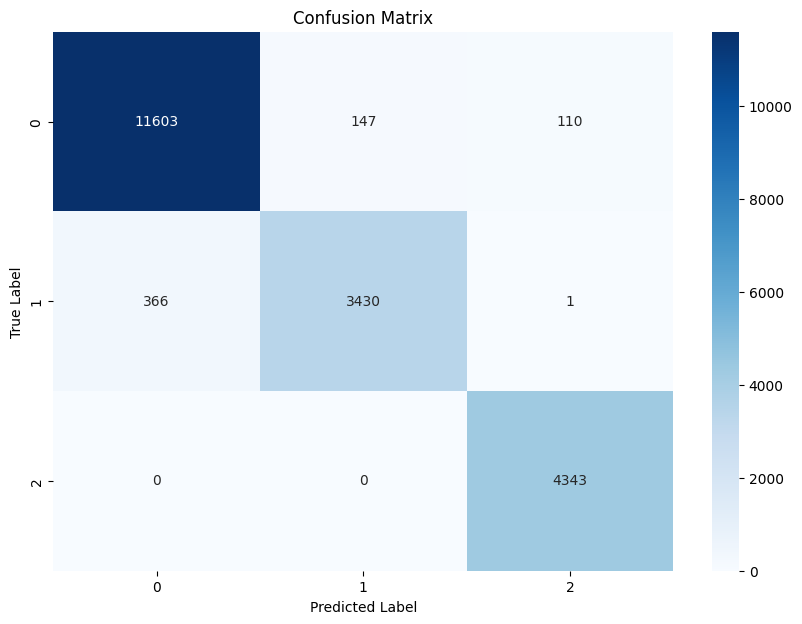

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.97     11860
           1       0.96      0.90      0.93      3797
           2       0.98      1.00      0.99      4343

    accuracy                           0.97     20000
   macro avg       0.97      0.96      0.96     20000
weighted avg       0.97      0.97      0.97     20000



In [28]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

y_test_classes = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_test_classes, y_pred_classes)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

print("Classification Report:")
print(classification_report(y_test_classes, y_pred_classes))

# Deployment

## Model Simulation

In [29]:
sample_input = np.array([[19.5, 18.9, 18.7, 18.6, 18.5, 0.05]])
sample_input_df = pd.DataFrame(sample_input, columns=['u', 'g', 'r', 'i', 'z', 'redshift'])

In [30]:
sample_input_scaled = scaler.transform(sample_input_df)

In [31]:
prediction = model.predict(sample_input_scaled)
predicted_class_index = np.argmax(prediction)
predicted_class_label = label_encoder.inverse_transform([predicted_class_index])[0]

print(f"Prediksi Kelas Benda Langit: {predicted_class_label}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step
Prediksi Kelas Benda Langit: GALAXY


## Save Model

In [36]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open('stellar.tflite', 'wb') as f:
    f.write(tflite_model)

Saved artifact at '/tmp/tmp76kb9kss'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 6), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 3), dtype=tf.float32, name=None)
Captures:
  137911566716944: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137911566716368: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137911566719440: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137911566713488: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137911566719632: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137911566717328: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137911566721360: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137911566720208: TensorSpec(shape=(), dtype=tf.resource, name=None)


In [35]:
print("data_min_ :", scaler.data_min_)
print("data_max_ :", scaler.data_max_)
print("scale_    :", scaler.scale_)
print("min_      :", scaler.min_)

data_min_ : [-9.999000e+03 -9.999000e+03  9.822070e+00  9.469903e+00 -9.999000e+03
 -9.970667e-03]
data_max_ : [32.78139  31.60224  29.57186  32.14147  29.38374   7.011245]
scale_    : [9.96831930e-05 9.96949112e-05 5.06334498e-02 4.41081113e-02
 9.97169660e-05 1.42425478e-01]
min_      : [ 0.99673225  0.99684942 -0.49732529 -0.41769954  0.99706994  0.00142008]
